# Hitori puzzle 

Solver for Hitori puzzles, see https://en.wikipedia.org/wiki/Hitori. Given an input:

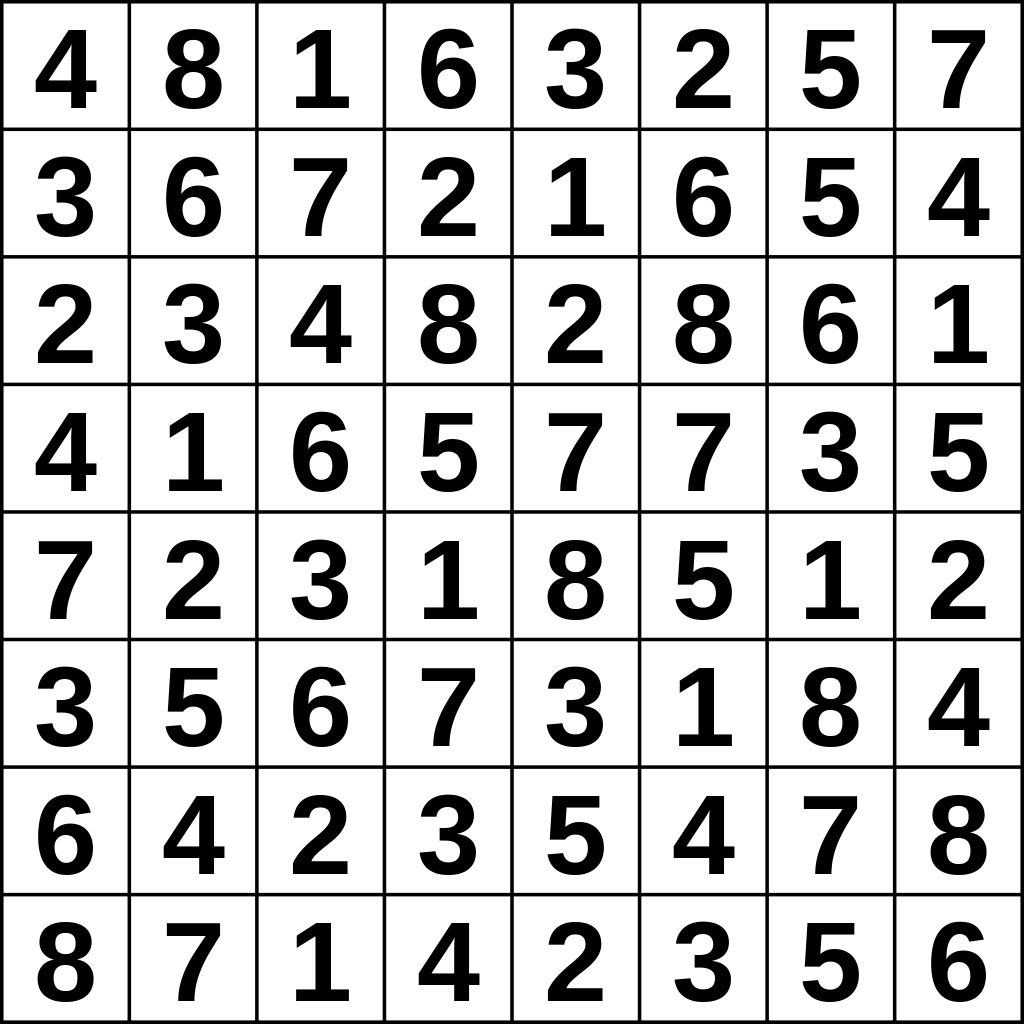

In [1]:
from IPython.display import Image, display
display(Image("./instances/Hitori_input.png", width=500))

The solution looks like:

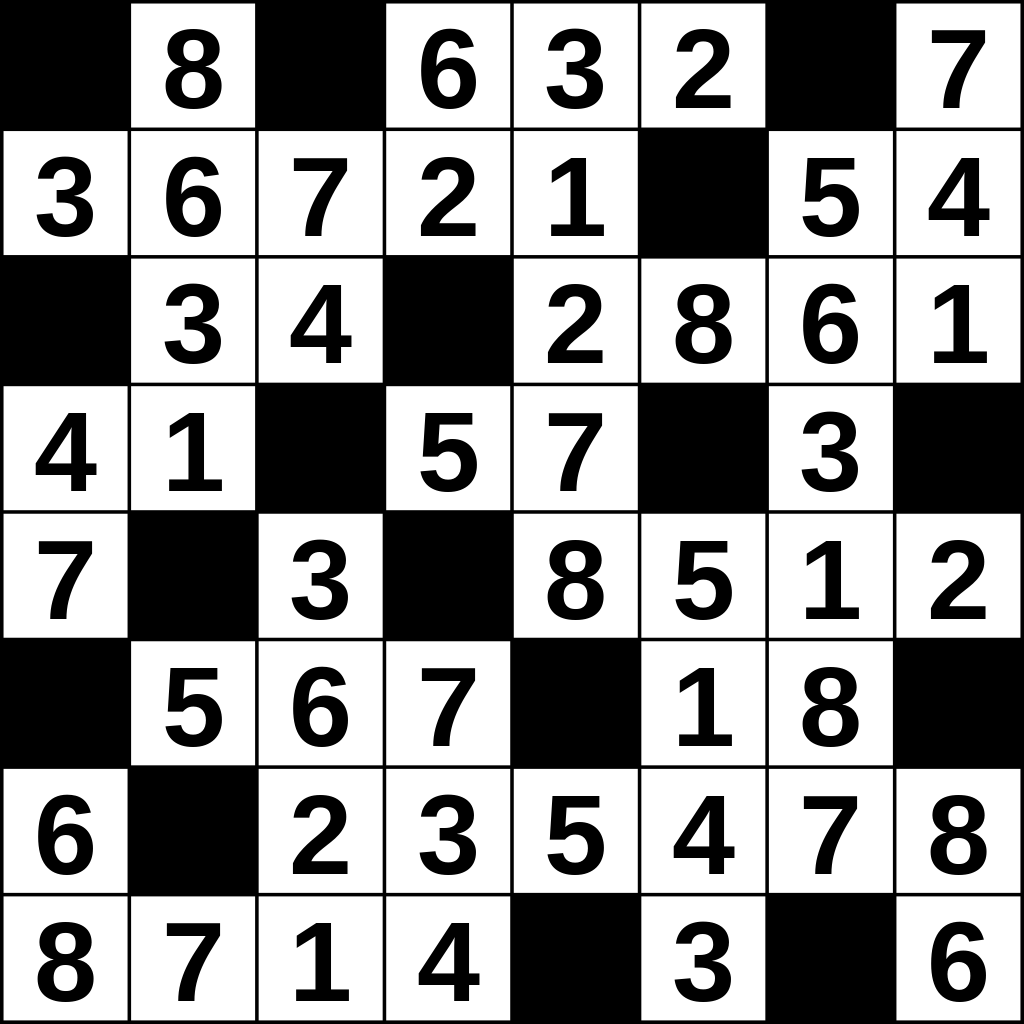

In [2]:
display(Image("./instances/Hitori_solution.png", width=500))

In [3]:
%%file ./instances/hitori_input.lp

field(
    1, 1, 4; 1, 2, 8; 1, 3, 1; 1, 4, 6; 1, 5, 3; 1, 6, 2; 1, 7, 5; 1, 8, 7;
    2, 1, 3; 2, 2, 6; 2, 3, 7; 2, 4, 2; 2, 5, 1; 2, 6, 6; 2, 7, 5; 2, 8, 4;
    3, 1, 2; 3, 2, 3; 3, 3, 4; 3, 4, 8; 3, 5, 2; 3, 6, 8; 3, 7, 6; 3, 8, 1;
    4, 1, 4; 4, 2, 1; 4, 3, 6; 4, 4, 5; 4, 5, 7; 4, 6, 7; 4, 7, 3; 4, 8, 5;
    5, 1, 7; 5, 2, 2; 5, 3, 3; 5, 4, 1; 5, 5, 8; 5, 6, 5; 5, 7, 1; 5, 8, 2;
    6, 1, 3; 6, 2, 5; 6, 3, 6; 6, 4, 7; 6, 5, 3; 6, 6, 1; 6, 7, 8; 6, 8, 4;
    7, 1, 6; 7, 2, 4; 7, 3, 2; 7, 4, 3; 7, 5, 5; 7, 6, 4; 7, 7, 7; 7, 8, 8;
    8, 1, 8; 8, 2, 7; 8, 3, 1; 8, 4, 4; 8, 5, 2; 8, 6, 3; 8, 7, 5; 8, 8, 6;
).

Overwriting ./instances/hitori_input.lp


It runs for 14 but not 15 bishops anymore (here the first ten solutions):

In [4]:
%%file ./instances/hitori.lp

#const columns=8.
#const rows=8.

% check input
:- not field(R,C,_), R=1..rows, C=1..columns.

% blacken fields rows and columns
{blackened(R, C): C=1..columns} <= columns/2 :- R=1..rows.
{blackened(R, C): R=1..rows} <= rows/2 :- C=1..columns.

% blackened are not adjecent
:- blackened(R,C), blackened(R-1, C), R=2..rows, C=1..columns.
:- blackened(R,C), blackened(R, C-1), R=1..rows, C=2..columns.

viewable(R,C,N) :- field(R,C,N), not blackened(R,C).

% viewable numbers are unique within row/column
:- viewable(R,C1,N), viewable(R,C2,N), C1!=C2, R=1..rows.
:- viewable(R1,C,N), viewable(R2,C,N), R1!=R2, C=1..columns.

% every viewable number must have a viewable number adjecent
:- viewable(R,C,_), blackened(R-1,C), blackened(R+1,C), blackened(R,C-1), blackened(R,C+1). %31038

:- viewable(R,C,_), blackened(R+1,C), blackened(R,C-1), blackened(R,C+1), R=1.
:- viewable(R,C,_), blackened(R-1,C), blackened(R,C-1), blackened(R,C+1), R=8.

:- viewable(R,C,_), blackened(R-1,C), blackened(R+1,C), blackened(R,C+1), C=1.
:- viewable(R,C,_), blackened(R-1,C), blackened(R+1,C), blackened(R,C-1), C=8.

%#minimize{1,R,C: blackened(R,C)}.
 
#show blackened/2.

Overwriting ./instances/hitori.lp


According to the encoding above there are 91 solutions to this puzzle:

In [5]:
!clingo ./instances/hitori_input.lp ./instances/hitori.lp -q 0

clingo version 5.6.2
Reading from ./instances/hitori_input.lp ...
Solving...
SATISFIABLE

Models       : 91
Calls        : 1
Time         : 0.005s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)
CPU Time     : 0.005s


Let's check some results

In [6]:
import subprocess
import json
import re

In [7]:
result = subprocess.run(["clingo", "./instances/hitori_input.lp", "./instances/hitori.lp", "10", "--outf=2"], stdout=subprocess.PIPE)
solutions = json.loads(result.stdout)["Call"][0]["Witnesses"]
solutions

[{'Value': ['blackened(1,1)',
   'blackened(1,3)',
   'blackened(1,7)',
   'blackened(2,6)',
   'blackened(2,8)',
   'blackened(3,1)',
   'blackened(3,4)',
   'blackened(4,3)',
   'blackened(4,6)',
   'blackened(4,8)',
   'blackened(5,2)',
   'blackened(5,7)',
   'blackened(6,1)',
   'blackened(6,5)',
   'blackened(7,2)',
   'blackened(8,5)',
   'blackened(8,7)']},
 {'Value': ['blackened(1,1)',
   'blackened(1,3)',
   'blackened(1,7)',
   'blackened(2,6)',
   'blackened(2,8)',
   'blackened(3,1)',
   'blackened(3,4)',
   'blackened(4,3)',
   'blackened(4,6)',
   'blackened(4,8)',
   'blackened(5,2)',
   'blackened(5,7)',
   'blackened(6,1)',
   'blackened(6,5)',
   'blackened(7,2)',
   'blackened(7,8)',
   'blackened(8,5)',
   'blackened(8,7)']},
 {'Value': ['blackened(1,1)',
   'blackened(1,3)',
   'blackened(1,7)',
   'blackened(2,6)',
   'blackened(2,8)',
   'blackened(3,1)',
   'blackened(3,4)',
   'blackened(4,3)',
   'blackened(4,6)',
   'blackened(4,8)',
   'blackened(5,2)',
   

Let's pick some solution:

In [8]:
sol = solutions[0] # the first solution
s = [s for s in sol['Value']]
s

['blackened(1,1)',
 'blackened(1,3)',
 'blackened(1,7)',
 'blackened(2,6)',
 'blackened(2,8)',
 'blackened(3,1)',
 'blackened(3,4)',
 'blackened(4,3)',
 'blackened(4,6)',
 'blackened(4,8)',
 'blackened(5,2)',
 'blackened(5,7)',
 'blackened(6,1)',
 'blackened(6,5)',
 'blackened(7,2)',
 'blackened(8,5)',
 'blackened(8,7)']

Visualize the solution:
- *N*: the number is visible
- *B*: the number is blackened

In [9]:
pattern = re.compile(r"blackened\((\d+),(\d+)\)")

def return_coodinates(sol):
    l = []
    for i in sol:
        coord = re.search(pattern, i)
        x,y = int(coord.group(1)), int(coord.group(2))
        l.append((x,y))
    return l

l = return_coodinates(s)

for x in range(1,9):
    print("\n",end="")
    for y in range(1,9):
        if (x,y) in l:
            print("B",end="")
        else:
            print("N",end="")
    


BNBNNNBN
NNNNNBNB
BNNBNNNN
NNBNNBNB
NBNNNNBN
BNNNBNNN
NBNNNNNN
NNNNBNBN

Visually we see that:
- *B*'s are only diagonally adjecent
- *N*'s are connected
- when crosschecking with the numbers above it can easily be verified that all visible numbers in each row/column are unique. 